In [1]:
# 필요한 라이브러리들을 불러옵니다.
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# 데이터셋을 불러옵니다.
data = sns.load_dataset('tips')

# 선형 회귀 모델을 정의하고 학습시킵니다.
# 여기서 종속 변수는 'tip'이고 독립 변수는 'total_bill'입니다.
model = smf.ols(formula='tip ~ total_bill', data=data)
result = model.fit()

# 학습된 모델의 결과를 출력합니다.
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 29 May 2023   Prob (F-statistic):           6.69e-34
Time:                        21:41:55   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

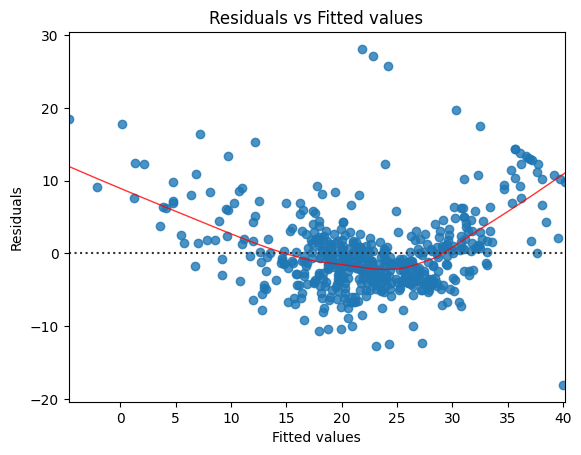

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀 모델 생성
model = smf.ols(formula='PRICE ~ RM + LSTAT', data=bostonDF)
results = model.fit()

# 잔차 그래프 생성
residuals = results.resid
sns.residplot(x=results.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

In [12]:
import pandas as pd
import statsmodels.formula.api as smf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

# boston 데이타셋 로드
bostonDF = pd.read_csv('./boston_house_prices.csv', header=1)
bostonDF.rename(columns={'MEDV':'PRICE'}, inplace=True)
model = smf.ols(formula='PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=bostonDF)
result = model.fit()

# 학습된 모델의 결과를 출력합니다.
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 29 May 2023   Prob (F-statistic):          6.72e-135
Time:                        22:46:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

### 해석
---

Model Information: 모델에 대한 기본적인 정보를 제공합니다. 이는 사용된 데이터의 개수, 종속 변수의 이름, 모델의 종류 등을 포함합니다.

R-squared (결정 계수): 결정 계수는 회귀 모델이 데이터에 얼마나 잘 적합되었는지 나타내는 지표입니다. 값이 1에 가까울수록 모델이 데이터를 잘 설명하고 있다고 판단할 수 있습니다.

Adj. R-squared (수정 결정 계수): 독립 변수의 개수가 늘어나면서 결정 계수가 인위적으로 높아지는 것을 보정한 값입니다.

coef (회귀 계수): 회귀 계수는 각 독립 변수가 종속 변수에 미치는 영향을 나타냅니다. 회귀 계수가 양수이면 해당 변수가 증가하면 종속 변수도 증가한다는 것을 의미하고, 음수이면 해당 변수가 증가하면 종속 변수가 감소한다는 것을 의미합니다.

std err (표준 오차): 회귀 계수의 표준 오차를 나타냅니다. 표준 오차가 작을수록 회귀 계수의 추정치가 더 정확합니다.

P>|t| (p-value): 각 독립 변수의 회귀 계수가 통계적으로 유의미한지를 나타내는 p-값입니다. p-값이 작을수록 (일반적으로 0.05 미만) 해당 독립 변수가 종속 변수에 더 큰 영향을 미친다고 판단할 수 있습니다.

[0.025 0.975] (95% 신뢰 구간): 회귀 계수의 95% 신뢰 구간을 나타냅니다. 이 구간이 0을 포함하지 않으면 해당 독립 변수의 회귀 계수가 통계적으로 유의미하다고 판단할 수 있습니다.

모델 해석 예시:

**결정 계수(R-squared)**는 0.741입니다. 이는 모델이 보스턴 주택 가격의 변동의 약 74.1%를 설명한다는 것을 의미합니다.

각 **독립 변수의 회귀 계수(coef)**를 살펴보면, 

'RM'(방의 평균 개수)은 양의 계수를 가지며, 'LSTAT'(모집단의 하위 계층 비율)은 음의 계수를 가지는 것을 볼 수 있습니다. 이는 'RM'이 증가할수록 주택 가격이 상승하는 경향이 있으며, 'LSTAT'이 증가할수록 주택 가격이 하락하는 경향이 있다는 것을 의미합니다.

또한, P>|t| (p-value) 항목을 보면, 대부분의 변수들이 통계적으로 유의미하다는 것을 알 수 있습니다. 이 값이 0.05보다 작으면 해당 독립 변수가 종속 변수에 대해 통계적으로 유의미한 영향을 미치는 것으로 판단합니다.

특히, 'RM'의 회귀 계수는 약 3.8이며 p-값은 매우 작습니다. 이는 방의 개수가 주택 가격에 매우 큰 영향을 미친다는 것을 의미합니다. 즉, 'RM'이 1 단위 증가하면 'MEDV'(주택 가격)는 평균적으로 약 3.8 단위 증가한다고 예상할 수 있습니다.

'LSTAT'의 회귀 계수는 약 -0.5이며 p-값은 매우 작습니다. 이는 모집단의 하위 계층 비율이 증가하면 주택 가격이 감소한다는 것을 나타냅니다. 즉, 'LSTAT'이 1 단위 증가하면 'MEDV'는 평균적으로 약 0.5 단위 감소한다고 예상할 수 있습니다.

이처럼, summary() 함수의 출력을 해석하는 것은 회귀 분석 결과를 이해하고, 각 독립 변수가 종속 변수에 어떤 영향을 미치는지, 그리고 이것이 통계적으로 유의미한지를 파악하는데 매우 중요합니다. 이를 통해 데이터에 대한 통찰력을 얻고, 더 나은 예측 모델을 만드는 데 도움이 될 수 있습니다.

**std err** 는 "표준 오차(Standard Error)"의 약자입니다. 이는 회귀 모델에서 회귀 계수의 추정치에 대한 불확실성을 나타내는 측정치입니다. 다시 말해, 표준 오차는 실제 회귀 계수와 추정된 회귀 계수 간의 차이를 측정합니다.

표준 오차가 작을수록, 회귀 계수의 추정치가 더 정확합니다. 반대로, 표준 오차가 클수록 회귀 계수의 추정치에 더 많은 불확실성이 있습니다. 이는 샘플링 오차나 모델의 미세조정 등에 의해 발생할 수 있습니다.

표준 오차는 또한 신뢰 구간과 가설 검정에도 사용됩니다. 95% 신뢰 구간은 일반적으로 추정치 ± (표준 오차 * 1.96)으로 계산되며, 이는 실제 회귀 계수가 이 구간 내에 있을 확률이 95%라는 것을 의미합니다. 또한, t-통계량은 회귀 계수의 추정치를 그 표준 오차로 나눈 값이며, 이는 회귀 계수가 통계적으로 유의미한지를 결정하는데 사용됩니다.

예를 들어, 'RM'(방의 평균 개수)의 회귀 계수가 3.8이고, 그 표준 오차가 0.2라면, 이는 'RM'이 주택 가격에 미치는 영향이 상대적으로 정확하게 추정되었음을 나타냅니다. 즉, 'RM'이 1 단위 증가할 때 주택 가격이 약 3.8 단위 증가하며, 이 추정치에는 약 ±0.2의 오차가 있을 수 있음을 의미합니다. 또한, 이를 바탕으로 'RM'의 95% 신뢰 구간은 약 3.4에서 4.2 사이로 계산될 수 있습니다.

- 왜 'RM'의 95% 신뢰 구간은 약 3.4에서 4.2 사이로 계산되지?

- "RM"의 95% 신뢰 구간은 회귀 계수의 추정치에서 표준 오차의 1.96배 (즉, z 점수 값이 ±1.96인 경우)를 더하거나 뺀 범위로 계산됩니다. 이는 표준 정규 분포에서 95%의 확률이 해당 범위 내에 있다는 사실에 기반한 것입니다.

- 예를 들어, "RM"의 회귀 계수 추정치가 3.8이고 표준 오차가 0.2라면, 95% 신뢰 구간은 다음과 같이 계산됩니다:

- 하한: 3.8 - (1.96 * 0.2) ≈ 3.4
- 상한: 3.8 + (1.96 * 0.2) ≈ 4.2

따라서, "RM"의 95% 신뢰 구간은 약 3.4에서 4.2 사이라고 할 수 있습니다. 이는 회귀 계수의 실제 값이 이 범위 내에 있을 확률이 95%라는 것을 의미합니다.

이렇게 계산된 신뢰 구간이 0을 포함하지 않으면, 해당 독립 변수의 회귀 계수가 통계적으로 유의미하다고 볼 수 있습니다. 즉, 해당 독립 변수가 종속 변수에 실제 영향을 미치고 있다는 것을 의미합니다.

F-통계량은 회귀 모델에서 종속 변수의 전체 변동성 중에서 모델이 설명하는 변동성이 얼마나 큰지를 측정하는 값입니다. 다시 말해, 전체 변동성 중 모델에 의해 설명되지 않는 변동성에 대비해서 모델이 얼마나 많은 변동성을 설명하고 있는지를 알려주는 통계량입니다.

F-통계량은 전체 모델이 통계적으로 유의미한지를 판단하는 데 사용됩니다. F-통계량이 크고, 관련 p-값이 작으면 (일반적으로 0.05 이하), 모델의 독립 변수들이 종속 변수를 예측하는 데 유의미하다는 것을 나타냅니다.

F-통계량은 아래의 식으로 계산됩니다:

F = (회귀 제곱합 / 회귀의 자유도) / (오차 제곱합 / 오차의 자유도)

여기서 회귀 제곱합은 모델이 설명하는 변동성을, 오차 제곱합은 모델이 설명하지 못하는 변동성을 나타냅니다. 회귀의 자유도는 독립 변수의 수이며, 오차의 자유도는 데이터 포인트의 수에서 독립 변수의 수를 뺀 것입니다.

이 F-통계량은 F-분포에 따르며, 이를 통해 p-값을 계산하여 모델의 유의성을 검정합니다.

즉, F-통계량과 그에 따른 p-값을 통해 모델이 데이터에 잘 맞는지 (즉, 모델이 데이터의 변동성을 충분히 설명하는지)를 평가할 수 있습니다. 만약 F-통계량이 크고 p-값이 작다면, 우리는 모델이 데이터에 잘 맞는다고 결론지을 수 있습니다.